In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
df = pd.read_csv('C:\\Users\\hanie\\Desktop\\DataFrames\\netflix.csv')

In [7]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [18]:
df['description'].head(3)

0    Before planning an awesome wedding for his gra...
1    Jandino Asporaat riffs on the challenges of ra...
2    With the help of three human allies, the Autob...
Name: description, dtype: object

In [8]:
summary = df.dropna(subset=['description'], axis=0)['description']

In [16]:
display(summary.iloc[:6000])


0       Before planning an awesome wedding for his gra...
1       Jandino Asporaat riffs on the challenges of ra...
2       With the help of three human allies, the Autob...
3       When a prison ship crash unleashes hundreds of...
4       When nerdy high schooler Dani finally attracts...
5       A young journalist is forced into a life of cr...
6       In a dystopian future, an insurance adjuster f...
7       Fabrizio Copano takes audience participation t...
8       As California's 2016 fire season rages, brave ...
9       A struggling couple can't believe their luck w...
10      Comedian and celebrity impersonator Joaquín Re...
11      When beer magnate Alfred "Freddy" Heineken is ...
12      A team of minstrels, including a monkey, cat a...
13      An artisan is cheated of his payment, a lion o...
14      A cat, monkey and donkey team up to narrate fo...
15      In three comic-strip-style tales, a boy tries ...
16      A cat, monkey and donkey learn the consequence...
17      Animal

In [19]:
all_summary = " ".join(s for s in summary)

In [20]:
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 896979


In [28]:
stopwords = set(STOPWORDS)
stopwords.update(["the", "a", "at", "from", "to", "the", "their", "who", "in", "is", "of", "As", "and"])

In [29]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

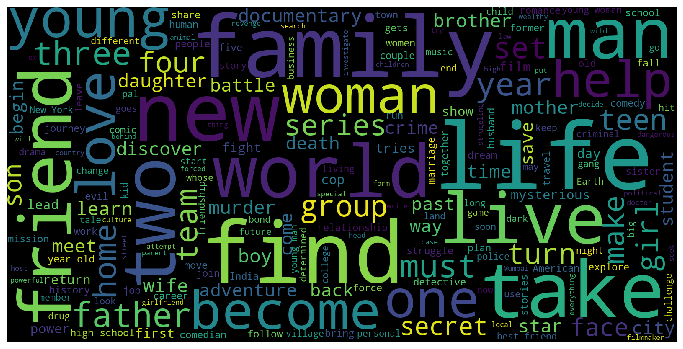

In [30]:
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("netflix_description_wordcloud.png")

In [68]:
netflix_logo = np.array(Image.open("C:\\Users\\hanie\\Desktop\\netflix_logo.png"))

In [69]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=netflix_logo, max_font_size=200,
                      min_font_size=1).generate(all_summary)

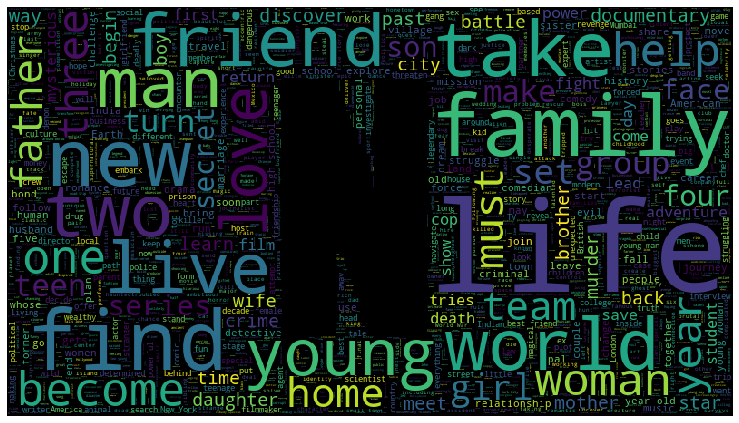

In [70]:
fig, ax = plt.subplots(figsize=(13,13))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("netflix_description_wordcloud.png")